# Exploring the stats on the leaderboard

# REWRITE THIS TO BE CLEARER

This note book does the following:

1. Ping the Leaderboard and cast it as a Pandas Dataframe
2. Show some graphs of the distribtion and corrilation between some varibles. 
3. Print the results of OLS regression on between some of the variables. 
4. A SQL table you can run queires againes using temp table in python

# Install Dependencies



In [42]:
!pip install numpy
!pip install pandas 
!pip install json 
!pip install requests 
!pip install matplotlit
!pip install statsmodels 

You should consider upgrading via the 'C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
You should consider upgrading via the 'C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement matplotlit (from versions: none)
ERROR: No matching distribution found for matplotlit
You should consider upgrading via the 'C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Import packages

In [43]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ping the Leaderboard

In [44]:
def get_leaderboard() -> pd.DataFrame:
    """
        Ping the Numerai leaderboard and return a Pandas DataFrame of the contents.
        https://numer.ai/tournament

    """
    url = 'https://api-tournament.numer.ai/'
    query = """{ 
	v2Leaderboard {
	    returns
        corrRep
        fncRep
        mmcRep
        username
        nmrStaked
        returns 
        return_52Weeks
        return_13Weeks
        rank
	    }  
    }"""
    r = requests.post(url=url, json={'query': query})
    json_data = json.loads(r.text)
    df_data = json_data['data']['v2Leaderboard']
    df = pd.DataFrame(df_data)
    df.convert_dtypes() # the auto casts the columns into what it thinks is the most appropriate 
    df['nmrStaked'] = pd.to_numeric(df['nmrStaked'])
    df = df.rename(columns={'returns': '1D_returns', 'return_13Weeks': '3M_returns', 'return_52Weeks': '1Y_returns'})
    return df

df =  get_leaderboard()
print(df.count())
df.head()


corrRep       5126
fncRep        5126
mmcRep        5126
nmrStaked     5126
rank          5126
3M_returns    1871
1Y_returns     398
1D_returns    2395
username      5126
dtype: int64


,corrRep,fncRep,mmcRep,nmrStaked,rank,3M_returns,1Y_returns,1D_returns,username
0,0.051299,0.013977,0.023419,775.855097,1,161.226172,NaN,-2.208261,quantyquant
1,0.048649,0.008177,0.021808,931.557869,2,156.947646,509.068926,-3.127175,benben11
2,0.048194,0.025251,0.019872,95.382757,3,55.924323,217.778678,-2.875499,labrat
3,0.042151,0.018633,0.014259,0.000000,4,NaN,NaN,NaN,ezekiel_47_v12
4,0.041467,0.015879,0.016793,0.000000,5,NaN,NaN,0.912701,uuazed4


# Look at some of the distributions


Some methods to create different types of plots. 

You can either use the default variables in defined in the method or you can substitute your own.

Every chart creater has the optional parmater min_stake. This refers to how the minimum stake size to filter by.The default is 0.


In [50]:
def create_box_plot(df, col='corrRep', min_stake=0):
    x = df[(df[col].notnull()) & (df['nmrStaked'] > min_stake)][col]
    is_null = df[(df[col].notnull() == False)][col]
    print(is_null.head())
    plt.boxplot(x, vert=False)
    num_elements = x.count()
    plt.title(
        f'Distribution of {col} nmrStaked>{min_stake}\n Number of Elements:{num_elements}'
    )
    plt.xlabel(col)
    plt.show()


def create_scatter_plot(df, x_name='corrRep', y_name='fncRep', min_stake=0):
    x = df[(df[x_name].notnull()) & (df['nmrStaked'] > min_stake)][x_name]
    y = df[(df[x_name].notnull()) & (df['nmrStaked'] > min_stake)][y_name]
    plt.scatter(x, y, s=.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    num_elements = x.count()
    plt.title(
        f'{y_name} v {x_name} when nmrStaked>{min_stake}\n Number of Elements:{num_elements}'
    )
    plt.show()


def create_histogram(df, col='corrRep', bins=50, min_stake=0):
    x = df[(df[col].notnull()) & (df['nmrStaked'] > min_stake)][col]
    plt.hist(x, bins)
    plt.xlabel(col)
    plt.ylabel('Count')
    num_elements = x.count()
    plt.title(
        f'Histogram of {col} when nmrStaked>{min_stake}\n Number of Elements:{num_elements}'
    )
    plt.show()


# Change the plot sizes
plt.rcParams["figure.figsize"] = (20,3)

Series([], Name: corrRep, dtype: float64)


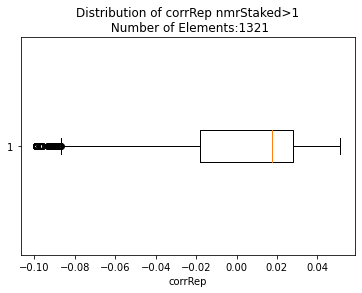

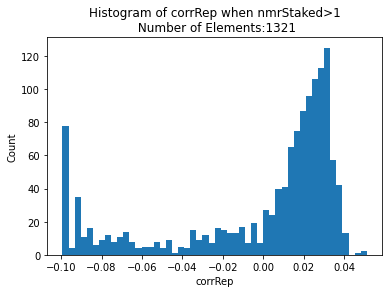

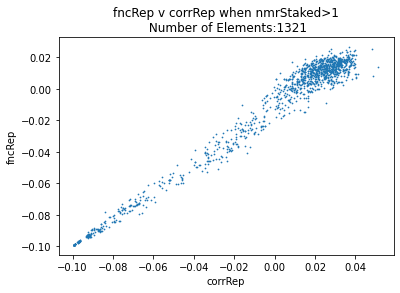

In [51]:
create_box_plot(df, min_stake=1)
create_histogram(df, min_stake=1)
create_scatter_plot(df, min_stake=1)